# Project Title: (Prediction of Product Sales).
  - Author: Mohammed Alsayed


## Project Overview

## Load and Inspect Data

In [1]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import required packages
import pandas as pd

# Save the filepath and load the data as "df_titanic"
fpath = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df = pd.read_csv(fpath)

In [3]:
# Display the first 5 rows
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# Display the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Clean Data

1) How many rows and columns?

Answer: 8523 rows and 12 columns

2) What are the datatypes of each variable?


In [5]:
# understand the data type for each column
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

We have 7 object, 4 float, and 1 integer columns

3) Are there duplicates? If so, drop any duplicates.

In [6]:
# Save a filter called "duplicated_rows" that identifies duplicated rows, then count its number
duplicated_rows = df.duplicated()
df.duplicated().sum()

0

In [7]:
# identify missing values
# Get the number of null values for all columns and save as a variable
df.isna()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,True,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
# Use this result to calculate the percentage of null values for each column.
null_sums = df.isna().sum()
null_percent = null_sums/len(df) * 100
null_percent

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

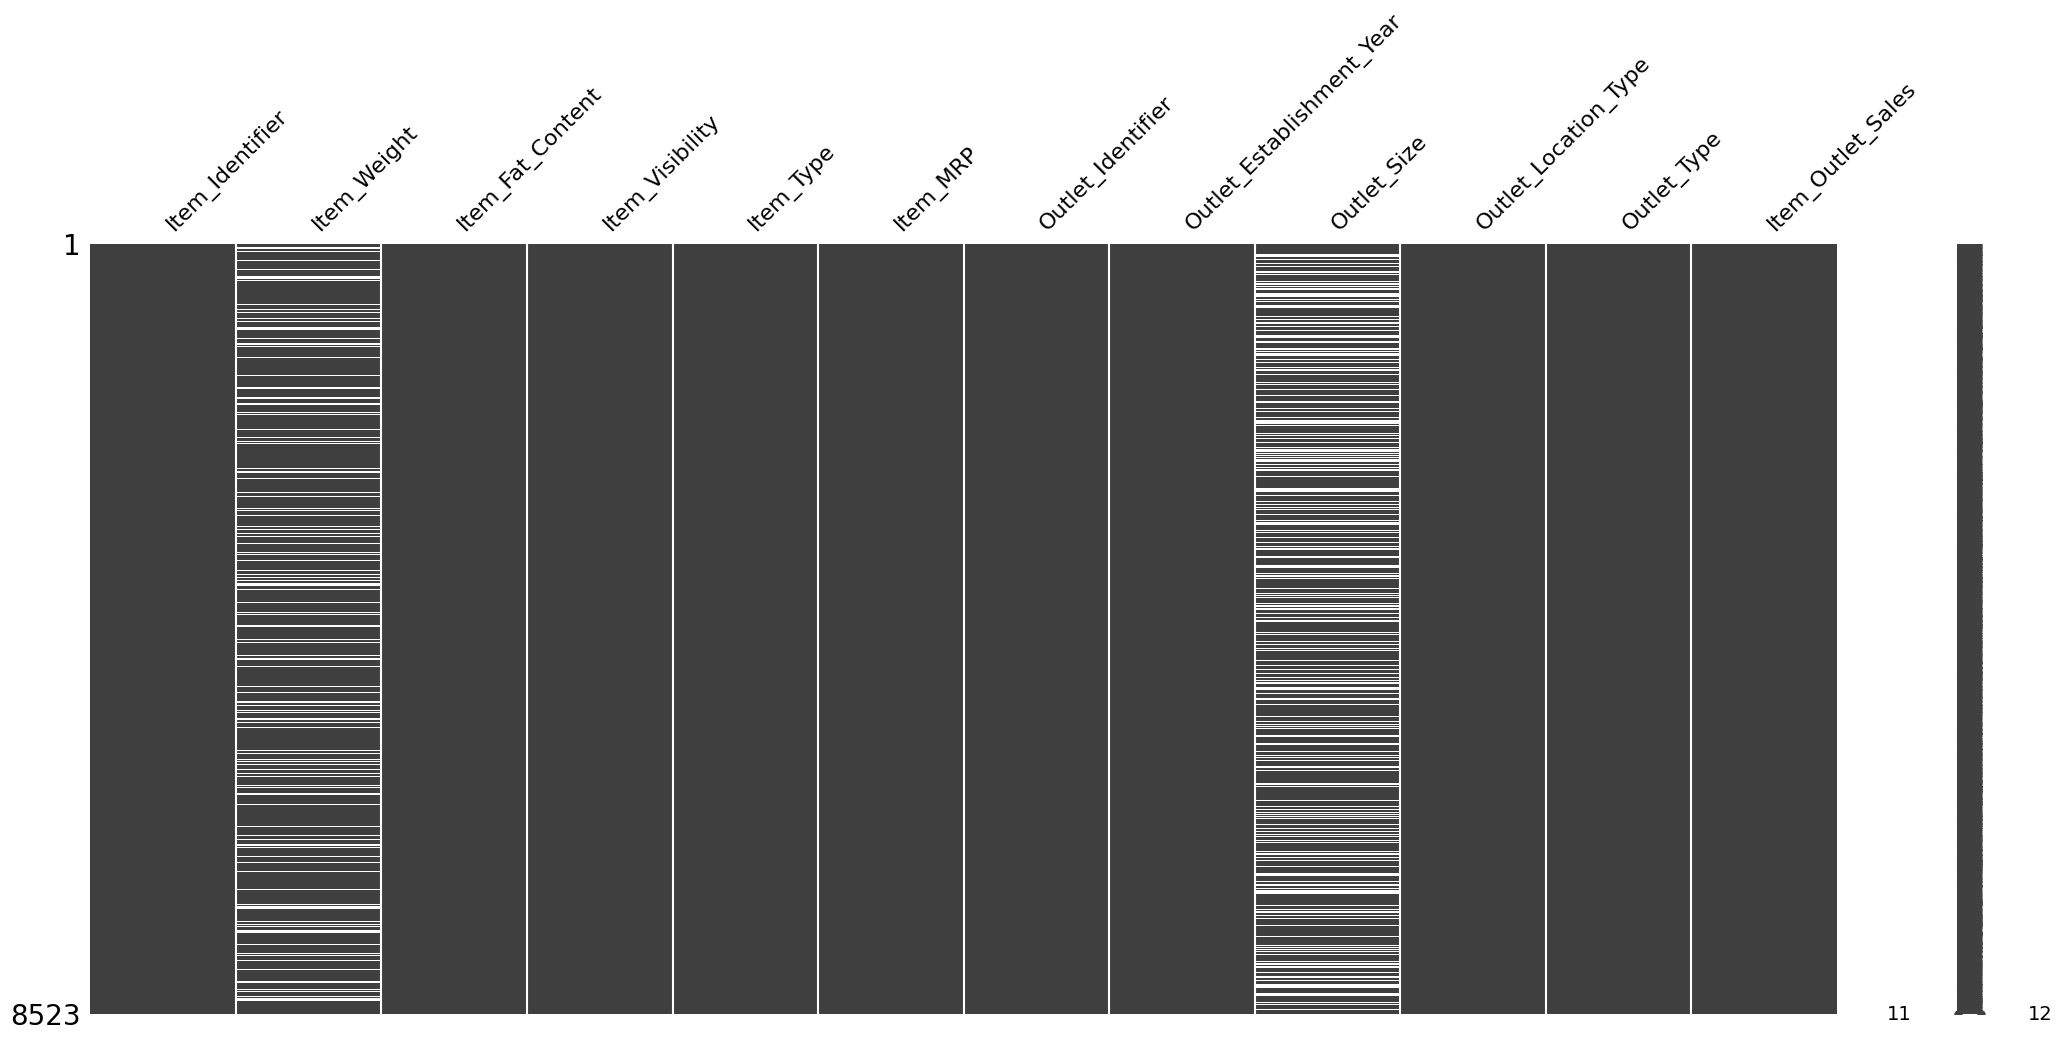

In [9]:
# Visualize the missing values using the missingno package's matrix plot.
import missingno as msno
msno.matrix(df);

5) Address the missing values by using a placeholder value.

In [10]:
# fill object null values with MISSING
df['Outlet_Size'] = df['Outlet_Size'].fillna("MISSING")
# fill numeric null values with MISSING
df['Item_Weight'] = df['Item_Weight'].fillna(-1)

In [11]:
# check if all missing data is filled now
null_sums = df.isna().sum()
null_percent = null_sums/len(df) * 100
null_percent

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64

## check for data inconsistency.

In [12]:
# define a list of object data columns
string_cols = df.select_dtypes("object").columns
string_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [13]:
# Check the nunique for just the object cols
string_cols = df[string_cols]
num_of_unique = string_cols.nunique()
(num_of_unique / len(string_cols)) *100
# Explore the value counts of one feature
string_cols.value_counts()

Item_Identifier  Item_Fat_Content  Item_Type              Outlet_Identifier  Outlet_Size  Outlet_Location_Type  Outlet_Type      
DRA12            LF                Soft Drinks            OUT035             Small        Tier 2                Supermarket Type1    1
FDV28            Regular           Frozen Foods           OUT010             MISSING      Tier 3                Grocery Store        1
FDV32            Low Fat           Fruits and Vegetables  OUT035             Small        Tier 2                Supermarket Type1    1
                                                          OUT019             Small        Tier 1                Grocery Store        1
                                                          OUT018             Medium       Tier 3                Supermarket Type2    1
                                                                                                                                    ..
FDJ22            Low Fat           Snack Foods            OU

In [14]:
# loop through the list of string columns
for col in string_cols:
  # print the value counts for the column
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  # Print an empty line for readability
  print('\n')

Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930


In [15]:
# replace the inconsistant data
string_cols['Item_Fat_Content'] = string_cols['Item_Fat_Content'].replace({'reg':"Regular",
                                                                           'Low Fat': 'low fat',
                                                                           'LF': 'low fat'})
string_cols['Item_Fat_Content'].value_counts()

<ipython-input-15-c993169c87d8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  string_cols['Item_Fat_Content'] = string_cols['Item_Fat_Content'].replace({'reg':"Regular",


low fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [16]:
# obtain a summary statistics
print(df.describe())

       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  8523.000000      8523.000000  8523.000000                8523.000000   
mean     10.478936         0.066132   140.992782                1997.831867   
std       6.720742         0.051598    62.275067                   8.371760   
min      -1.000000         0.000000    31.290000                1985.000000   
25%       6.650000         0.026989    93.826500                1987.000000   
50%      11.000000         0.053931   143.012800                1999.000000   
75%      16.000000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  


save the data

In [17]:
# Save the folder + filename as a variable called fpath
fpath_out = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/Clean_sales_prediction_2023.csv"
# Use to_csv to save the dataframe using the filename
df.to_csv(fpath_out, index=True)

In [18]:
# check if everything is right
# Read in your new .csv file with Pandas.
loaded = pd.read_csv(fpath_out)
# Display the info summary.
loaded.info()
# Display the first 5 rows.
loaded.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 8523 non-null   int64  
 1   Item_Identifier            8523 non-null   object 
 2   Item_Weight                8523 non-null   float64
 3   Item_Fat_Content           8523 non-null   object 
 4   Item_Visibility            8523 non-null   float64
 5   Item_Type                  8523 non-null   object 
 6   Item_MRP                   8523 non-null   float64
 7   Outlet_Identifier          8523 non-null   object 
 8   Outlet_Establishment_Year  8523 non-null   int64  
 9   Outlet_Size                8523 non-null   object 
 10  Outlet_Location_Type       8523 non-null   object 
 11  Outlet_Type                8523 non-null   object 
 12  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage:

,Unnamed: 0,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
4,4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Exploratory Dana Analysis

In [19]:
# import important libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Visualizing analysis to undersand its variability

- starting with univariate analysis for the 'Item Fat Content', 'Item Type', and 'Outlet Type' features.  

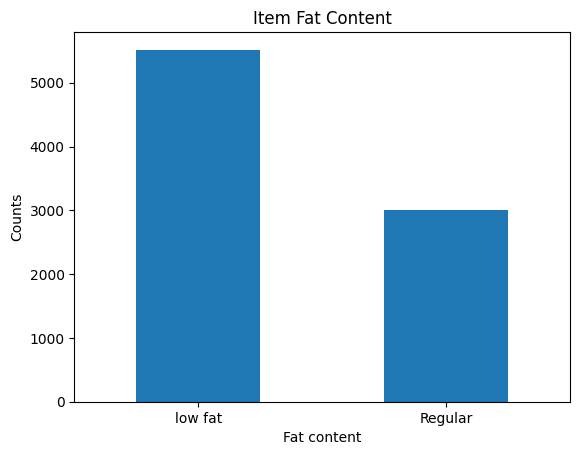

In [20]:
# count plot for the "Item_Fat_Content"
ax = string_cols['Item_Fat_Content'].value_counts().plot(kind='bar')
ax.tick_params(axis='x', rotation = 0)
plt.title("Item Fat Content")
plt.xlabel('Fat content')
plt.ylabel('Counts');

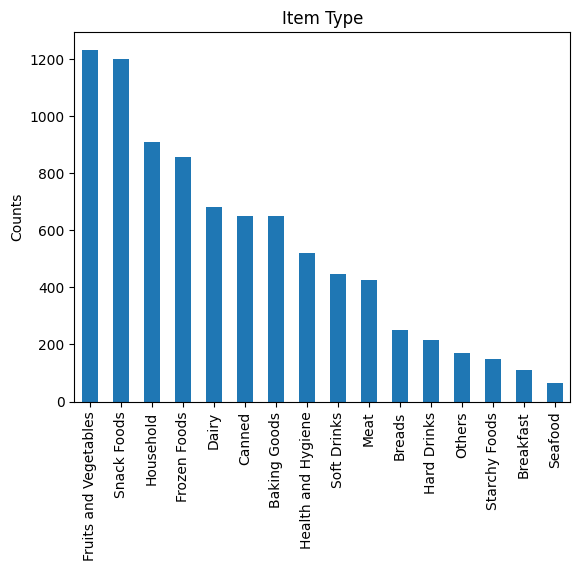

In [21]:
# count plot for the "Item_Type"
ax = string_cols['Item_Type'].value_counts().plot(kind='bar')
ax.tick_params(axis='x', rotation = 90)
plt.title("Item Type")
plt.ylabel('Counts');

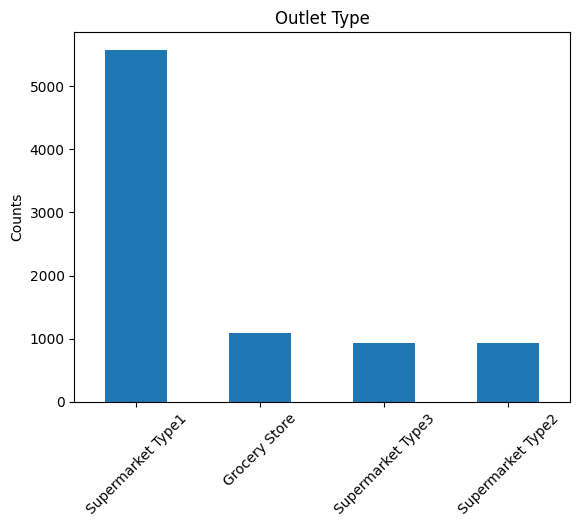

In [22]:
# count plot for the "Item_Fat_CoOutlet_Type"
ax = string_cols['Outlet_Type'].value_counts().plot(kind='bar')
ax.tick_params(axis='x', rotation = 45)
plt.title("Outlet Type")
plt.ylabel('Counts');

### Conclusions:
- Univariate counts analysis showed that Low fat content is constitute almost double the number of regular fat components.
- when it comes to items type, the highest frequency are fruits and vegetables, snack foods, household, and frozen foods.
- the outlet type analysis showed that Supermarket Type1 constitute more than 50% of the sales.

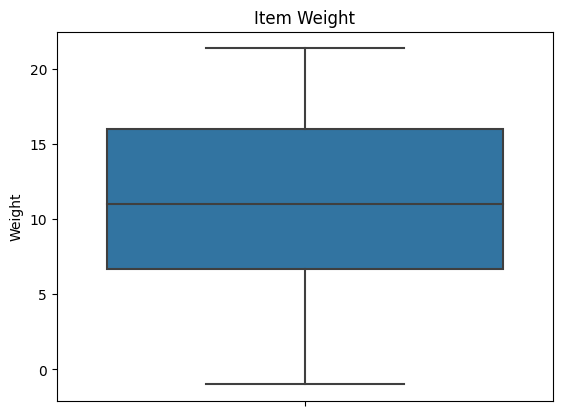

In [23]:
# Create a boxplot for the Item Weight
ax = sns.boxplot(data=df, y="Item_Weight")
ax.set_ylabel("Weight")
ax.set_title("Item Weight");

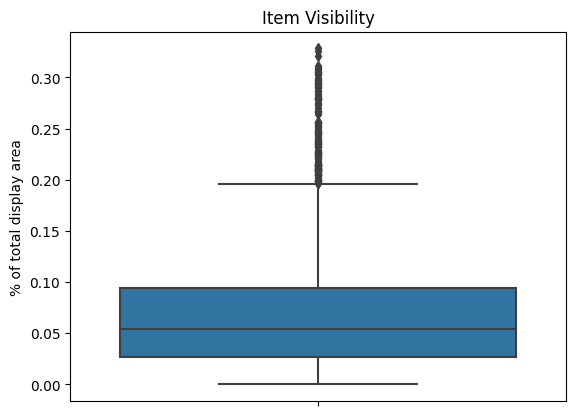

In [24]:
# Create a boxplot for the Item Visibility that is the percentage of total display area of all products in a store allocated to the particular product
ax = sns.boxplot(data=df, y="Item_Visibility")
ax.set_ylabel("% of total display area")
ax.set_title("Item Visibility");

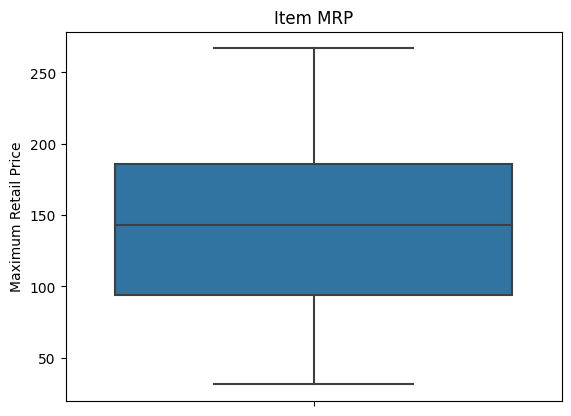

In [25]:
# Create a boxplot for the Item MARP that is the maximum retail price (list price) of the product
ax = sns.boxplot(data=df, y="Item_MRP")
ax.set_ylabel("Maximum Retail Price")
ax.set_title("Item MRP");

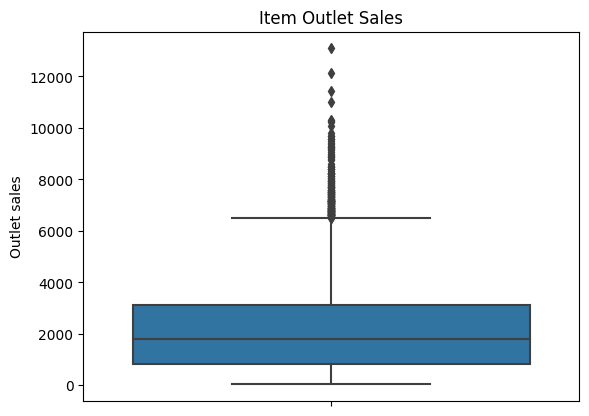

In [26]:
# Create a boxplot for the Item Outlet Sales, that is the sales of the product in a particular store.
ax = sns.boxplot(data=df, y="Item_Outlet_Sales")
ax.set_ylabel("Outlet sales")
ax.set_title("Item Outlet Sales");

### Conclusions:
- The boxplots showed that Item visibility and Item outlet sales features contain many upper outlier values.
- It also showed that Item weight and Item MRP values are distributed almost equally around the median.

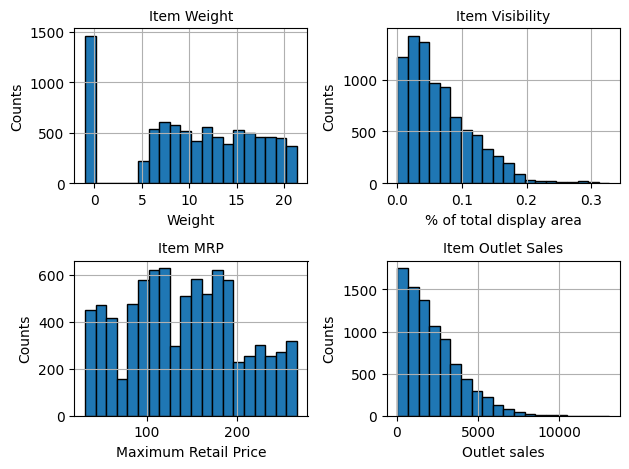

In [27]:
# Plot matrix of histograms to understand the variability of Item weight, Item visibility, Item MRP, and Item outlet sales.

# define the matrix size
fig, axes = plt.subplots(nrows=2, ncols=2)

# plot the Item weight
ax = df['Item_Weight'].hist(ax=axes[0,0], bins = 20, edgecolor = 'black')
ax.tick_params(axis='x', rotation = 0)
ax.set_title('Item Weight', size=10)
ax.set_xlabel('Weight', size=10)
ax.set_ylabel('Counts', size=10);
ax.tick_params(axis='both', labelsize=10)

# plot the item visibility
ax = df['Item_Visibility'].hist(ax=axes[0,1], bins = 20, edgecolor = 'black')
ax.tick_params(axis='x', rotation = 0)
ax.set_title('Item Visibility', size=10)
ax.set_xlabel('% of total display area', size=10)
ax.set_ylabel('Counts', size=10);
ax.tick_params(axis='both', labelsize=10)

# plot the item MRP
ax = df['Item_MRP'].hist(ax=axes[1,0], bins = 20, edgecolor = 'black')
ax.tick_params(axis='x', rotation = 0)
ax.set_title('Item MRP', size=10)
ax.set_xlabel('Maximum Retail Price', size=10)
ax.set_ylabel('Counts', size=10);
ax.tick_params(axis='both', labelsize=10)

# plot the Item outlet sales
ax = df['Item_Outlet_Sales'].hist(ax=axes[1,1], bins = 20, edgecolor = 'black')
ax.tick_params(axis='x', rotation = 0)
ax.set_title('Item Outlet Sales', size=10)
ax.set_xlabel('Outlet sales', size=10)
ax.set_ylabel('Counts', size=10);
ax.tick_params(axis='both', labelsize=10)

plt.tight_layout()

### Conclusions:
- from the above histograms, it is notable that for item outlet sales, most of the counts are in the data lower values.
- for the item visibility plot, most of the counts are located between 0.0 and 0.06.
- for the MRP, data variability does not give clear indicator.
- for item weight, large number of the counts are in the smallest weights cluster.

### Executing multivariate analysis for different features

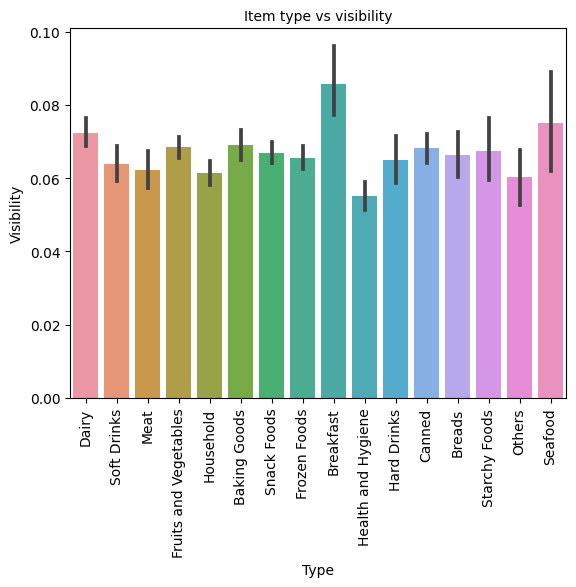

In [28]:
# Using seaborn to plot the group means
ax = sns.barplot(data=df, x='Item_Type', y="Item_Visibility")
ax.tick_params(axis='x', rotation = 90)
ax.set_title('Item type vs visibility', size=10)
ax.set_xlabel('Type', size=10);
ax.set_ylabel('Visibility', size=10);
ax.tick_params(axis='both', labelsize=10);

### Conclusions:
- there is no significant different when it comes to visibility vs type. However, breakfast item type benefit from the highest visibility values. This is normal since it is a quick turnover item. In contrast, health and hygiene item suffers from the lowes visibility indicator, which is also normal since the item expected turnover is relatively low.

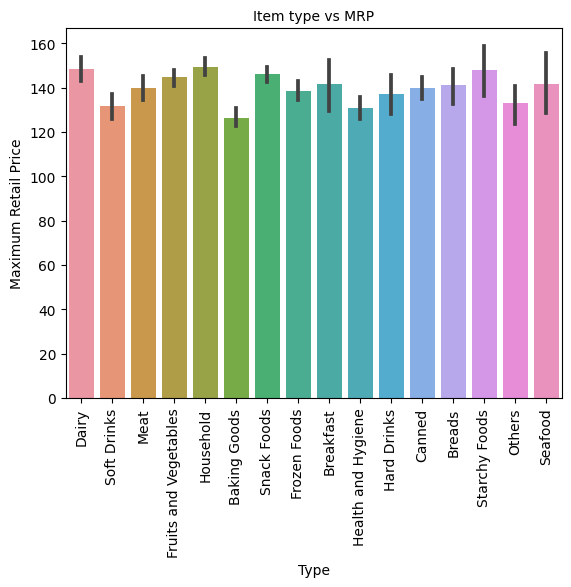

In [29]:
# Using seaborn to plot the group means
ax = sns.barplot(data=df, x='Item_Type', y="Item_MRP")
ax.tick_params(axis='x', rotation = 90)
ax.set_title('Item type vs MRP', size=10)
ax.set_xlabel('Type', size=10);
ax.set_ylabel('Maximum Retail Price', size=10);
ax.tick_params(axis='both', labelsize=10);

### Conclusion:
- no significant variability.

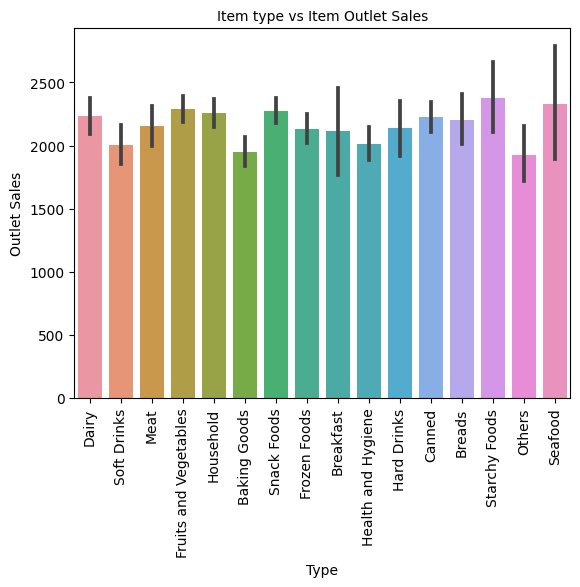

In [30]:
# Using seaborn to plot the group means
ax = sns.barplot(data=df, x='Item_Type', y="Item_Outlet_Sales")
ax.tick_params(axis='x', rotation = 90)
ax.set_title('Item type vs Item Outlet Sales', size=10)
ax.set_xlabel('Type', size=10);
ax.set_ylabel('Outlet Sales', size=10);
ax.tick_params(axis='both', labelsize=10);

### Conclusion:
- No signifcant variability.

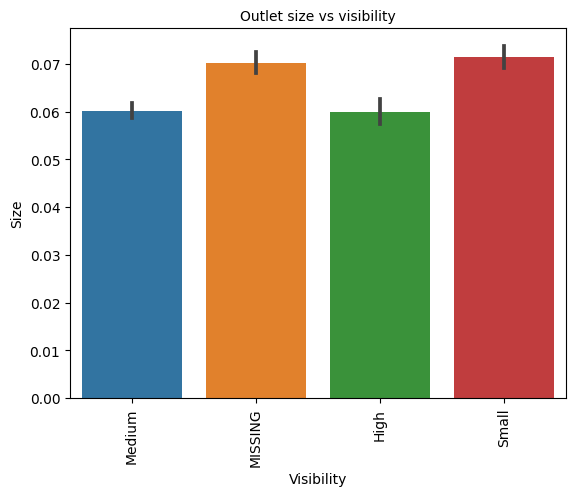

In [31]:
# Using seaborn to plot the group means
ax = sns.barplot(data=df, x='Outlet_Size', y="Item_Visibility")
ax.tick_params(axis='x', rotation = 90)
ax.set_title('Outlet size vs visibility', size=10)
ax.set_xlabel('Visibility', size=10);
ax.set_ylabel('Size', size=10);
ax.tick_params(axis='both', labelsize=10);

### Conclusion:
- The item visibility does not vary significantly with its size.

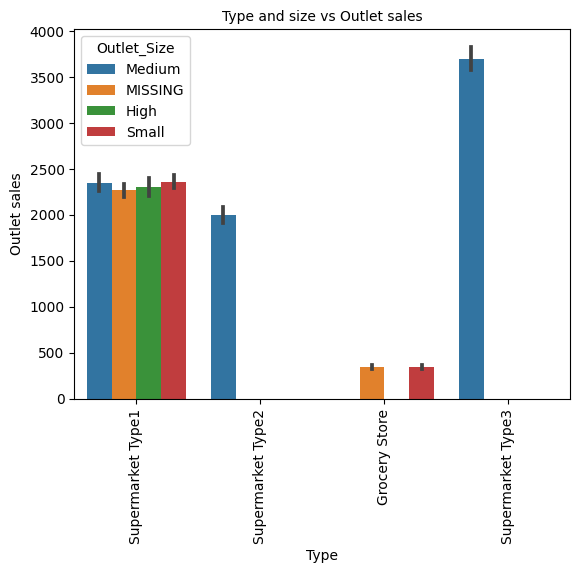

In [32]:
# Using seaborn to plot the group means
ax = sns.barplot(data=df, x='Outlet_Type', y="Item_Outlet_Sales", hue="Outlet_Size")
ax.tick_params(axis='x', rotation = 90)
ax.set_title('Type and size vs Outlet sales', size=10)
ax.set_xlabel('Type', size=10);
ax.set_ylabel('Outlet sales', size=10);
ax.tick_params(axis='both', labelsize=10);

### Conclusion:
- In all outlet types, the medium size outlets constitute the largest share when it comes to Outlet sales.

### Explore the correlations between numeric features.

In [33]:
# Get correlations
corr = df.corr(numeric_only = True)
corr.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.08,0.02,0.54,-0.06
Item_Visibility,-0.08,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,0.54,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,-0.06,-0.13,0.57,-0.05,1.00


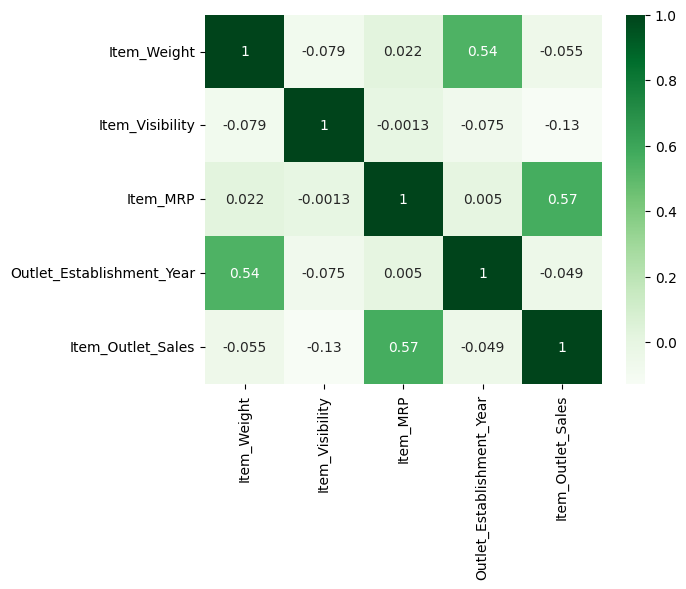

In [34]:
# Include annotations on the heatmap
sns.heatmap(corr, cmap = 'Greens', annot = True);

### Conclusions:
- most of the corelation values are weak.
- there is a good positive correlation between Item_MRP and Item_Outlet_Sales (correlation = 0.57), that means the higher the MRP, and more Outlet_Sales will be.
- there is a good positive correlation (0.54) between Item_Weights and Outlet_Establishment_Year.

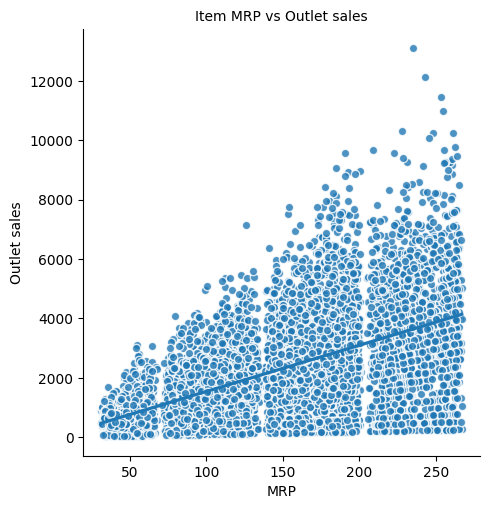

In [35]:
# Set the title using g.ax.set_title()
line_kws = dict(color='black')
scatter_kws = dict(edgecolor='white')
g = sns.lmplot(data=df, x="Item_MRP", y="Item_Outlet_Sales",
               scatter_kws=scatter_kws);
g.ax.tick_params(axis='x', rotation = 0)
g.ax.set_title('Item MRP vs Outlet sales', size=10)
g.ax.set_xlabel('MRP', size=10);
g.ax.set_ylabel('Outlet sales', size=10);
g.ax.tick_params(axis='both', labelsize=10);

## Feature Inspection